## 7-6연습문제

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
(x_train,y_train),(x_test,y_test)=ds.cifar100.load_data()
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,100)
y_test=tf.keras.utils.to_categorical(y_test,100)

In [8]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=100,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
391/391 - 8s - 20ms/step - accuracy: 0.0737 - loss: 4.1452 - val_accuracy: 0.1149 - val_loss: 3.8869
Epoch 2/50
391/391 - 7s - 18ms/step - accuracy: 0.1354 - loss: 3.7507 - val_accuracy: 0.1465 - val_loss: 3.7011
Epoch 3/50
391/391 - 7s - 18ms/step - accuracy: 0.1643 - loss: 3.5821 - val_accuracy: 0.1731 - val_loss: 3.5581
Epoch 4/50
391/391 - 7s - 18ms/step - accuracy: 0.1841 - loss: 3.4697 - val_accuracy: 0.1795 - val_loss: 3.5055
Epoch 5/50
391/391 - 8s - 20ms/step - accuracy: 0.2018 - loss: 3.3742 - val_accuracy: 0.1982 - val_loss: 3.4401
Epoch 6/50
391/391 - 8s - 22ms/step - accuracy: 0.2182 - loss: 3.2900 - val_accuracy: 0.2035 - val_loss: 3.3757
Epoch 7/50
391/391 - 8s - 20ms/step - accuracy: 0.2329 - loss: 3.2102 - val_accuracy: 0.2085 - val_loss: 3.3451
Epoch 8/50
391/391 - 8s - 20ms/step - accuracy: 0.2480 - loss: 3.1369 - val_accuracy: 0.2187 - val_loss: 3.2978
Epoch 9/50
391/391 - 8s - 21ms/step - accuracy: 0.2589 - loss: 3.0752 - val_accuracy: 0.2273 - val_loss:

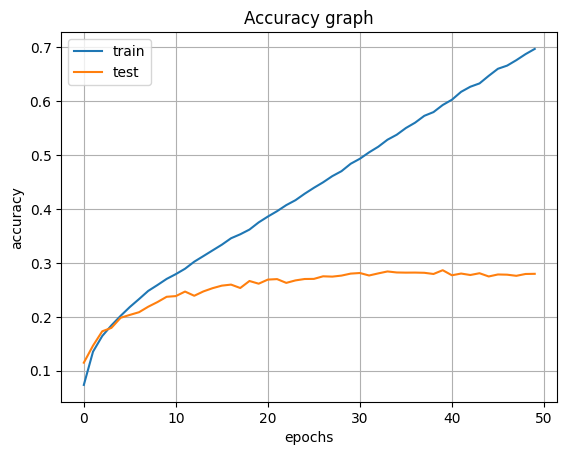

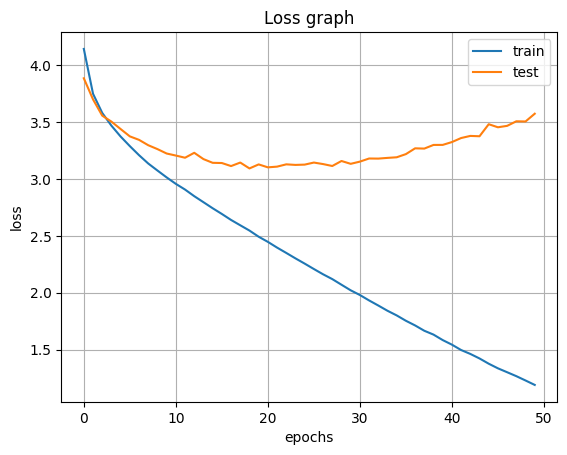

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()